# Анализ интернет-магазина игр

**Описание проекта**
  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
  
**Описание данных:**
  
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Распаковка файлов, загрузка пакетов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в датасете 11 колонок и 16715 строк. Пропуски есть в 6 столбцах. 

### Подготовка данных

In [4]:
#приведём названия столбцов к нижнему регистру
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Нам нужно поменять типы данных в трёх переменных: `year_of_release`, `critic_score`, `user_score`. Год релиза не может быть вещественным числом. Оценки пользователей b оценки критиков стоит преобразовать в вещественные числа.

In [6]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Из рассматриваемых столбцов в одном из нашлось строковое значение - tbd. Данная аббревиатура расшифровывается как to be determined ("будет определено"). Можем эти значения заменить на NaN.

In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь можем поменять типы данных.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df[['user_score', 'critic_score']] = df[['user_score', 'critic_score']].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [11]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В колонке `name` и `genre` всего 2 строки с пропущенными значениями, можем смело их удалить.

In [12]:
df = df.dropna(subset = ['name'])

In [13]:
df.isnull().sum(axis=0).sort_values()

name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
year_of_release     269
rating             6764
critic_score       8576
user_score         9123
dtype: int64

Посмотрим на 10 случайных строк с пропущенным значением в столбце `rating`, чтобы попытаться объяснить их существование.

In [14]:
df[df['rating'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15338,Mario Tennis,3DS,<NA>,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
9673,Clock Tower: The First Fear,PS,1997,Adventure,0.00,0.00,0.12,0.01,NaN,NaN,NaN
12012,IA/VT Colorful,PSV,2015,Misc,0.00,0.00,0.07,0.00,NaN,NaN,NaN
11247,Cyberia,PS,1995,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
9795,Harvest Moon 2 GBC,GB,1999,Simulation,0.00,0.00,0.12,0.00,NaN,NaN,NaN
16358,No Fate! Only the Power of Will,X360,2010,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11277,Aibou DS,DS,2009,Adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN
16480,Nova Usagi no Game de Ryuugaku!? DS,DS,2007,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
4254,Mega Man Star Force 3: Black Ace / Red Joker,DS,2008,Action,0.22,0.00,0.22,0.02,NaN,NaN,NaN
16121,Postman Pat: Special Delivery Service,DS,2009,Misc,0.00,0.01,0.00,0.00,NaN,NaN,NaN


Мы можем заметить, что в некоторых случаях пропуски есть сразу в трёх столбцах: `rating`, `user_score`, `critic_score`. Пропуски могли появиться по нескольким причинам. 
  
1. Игра имеет мало продаж, совершенно не популярна, поэтому она и не имеет множества публичных оценок.
2. Возможно игра может быть слишком новой, из-за чего она ещё не имеет оценок.

In [15]:
df['year_of_release'].isna().sum()

269

Всего в столбце `year_of_realease` 269 пропусков. Можно попробовать заполнить часть пропусков теми играми, чьё название совпадает с игрой без года.

In [16]:
for i in df[df['year_of_release'].isnull() == True].index:  
    df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()
    
df['year_of_release'].isna().sum()

/tmp/ipykernel_48/2149726417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'][i] = df.loc[df['name'] == df['name'][i], 'year_of_release'].max()


146

Всего осталось 146 пропусков, можем удалить строки с ними, так как это маленький процент от всех данных.

In [17]:
df = df.dropna(subset = ['year_of_release'])

Создадим отдельный столбец с данными о суммарных продажах.

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


Также посмотрим, есть ли явные дубликаты в датафрейме.

In [19]:
df.duplicated().sum()

0

In [20]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4127,Sonic the Hedgehog,PS3,2006,Platform,0.0,0.48,0.0,0.0,43.0,4.1,E10+,0.48
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


При этом оказалось, что есть две игры, которые дважды встречаются в датафрейме. Удалим их.

In [21]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [22]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


В итоге предобработки мы привели названия столбцов к нижнему регистру, поменяли тип данных в трёх переменных, избавились от некоторых пропусков и дубликатов. Создали столбцец с суммарными продажами, который понадобится нам в анализе.

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

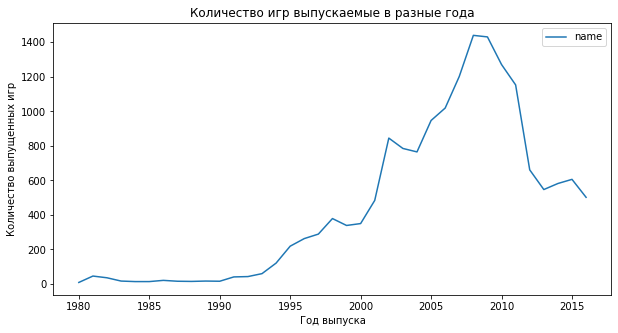

In [23]:
games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(10,5))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр");

Пик выпуска компьютерных игр пришёлся на 2008 год. С 2000 выпуск начал сильно расти, вероятно из-за распространения устройств, на которых люди могут играть в компьютерные игры. После 2008 года выпуск пошёл на убыль, скорее из-за появления мобильного гейминга. Данные до 1990 года не важны, так как игр созданных до этого крайне мало.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сначала выберем платформы с наибольшими суммарными продажами, для этого построим график со всеми платформами.

Text(0, 0.5, 'Суммарные продажи')

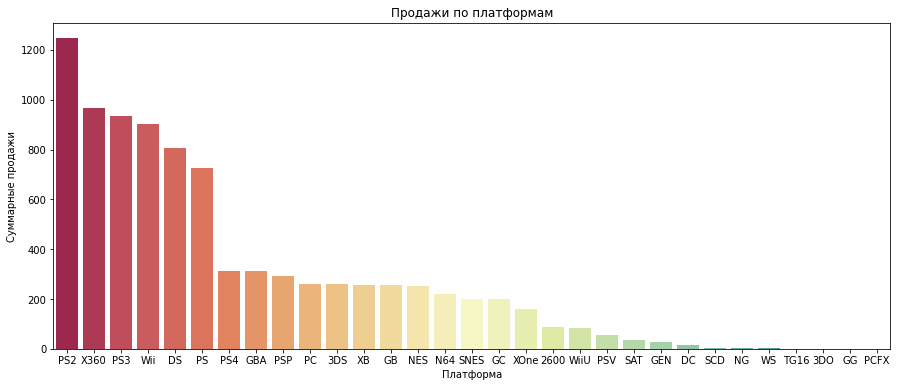

In [24]:
platform_sales = df\
                    .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                    .sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'], palette="Spectral")
plt.title("Продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи")

Главными лидерами являются следующие компании: PS2, X360, PS3, Wii, DS, PS. Посмотрим на их продажи по отдельности.

In [25]:
top_platforms = platform_sales.iloc[0:6]
top_platforms

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,934.70
Wii,903.31
DS,804.28
PS,727.58


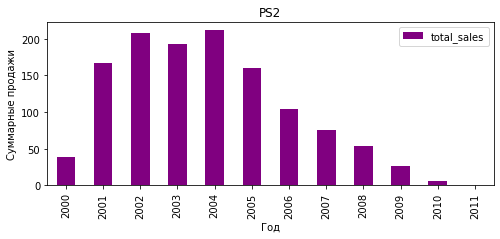

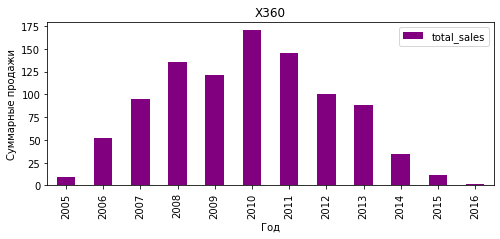

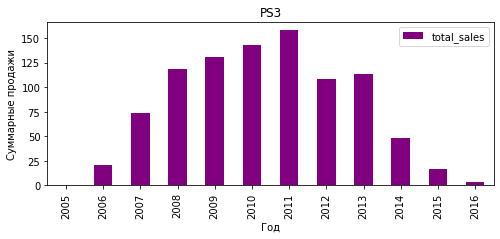

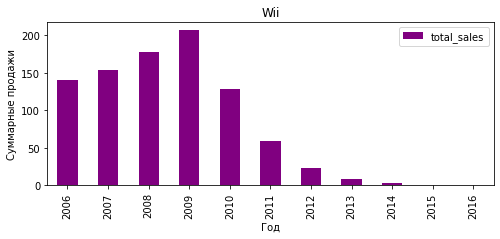

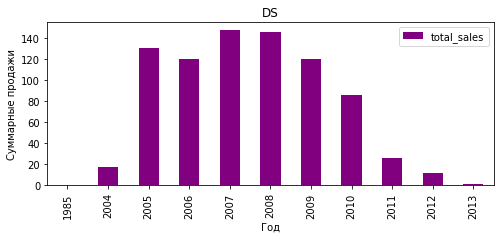

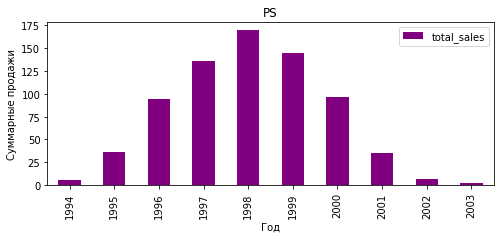

In [26]:
for platform in top_platforms.index:
    df[df['platform'] == platform]\
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
        .plot(kind = 'bar', figsize=(8,3), color='purple')
    plt.title(platform)
    plt.xlabel("Год")
    plt.ylabel("Суммарные продажи")

Можно сделать вывод о том, что каждая платформа существует около 10 лет. Самыми продаваемыми платформами являются PlayStation (1, 2 и 3 версий), Xbox 360 и Nintendo DS и Wii.

#### Какие платформы лидируют по продажам, растут или падают? 

In [27]:
#возьмем данные за последние 5 лет
actual_data = df.query('year_of_release > 2011') 

<AxesSubplot:xlabel='year_of_release'>

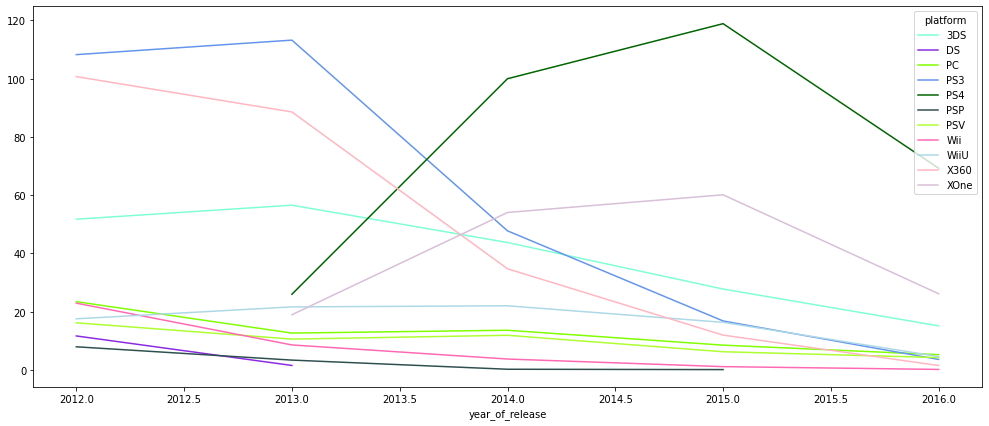

In [28]:
actual_data\
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
    .plot(figsize=(17, 7), color=('aquamarine', 'blueviolet', 'chartreuse', 'cornflowerblue',\
                                  'darkgreen', 'darkslategray', 'greenyellow', 'hotpink',\
                                  'lightblue', 'lightpink', 'thistle', 'black'))

В итоге мы можем выделить общую тенденцию к снижению продаж среди всех платформ. Но при всём этом мы можем выделить потенциально прибыльные платформы и те, которые потенциально будут хуже продаваться.
  
Потенциально прибыльные: PS4, XOne, 3DS.  
Потенциально будут продаваться хуже остальных: X360, Wii, PS3.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:>

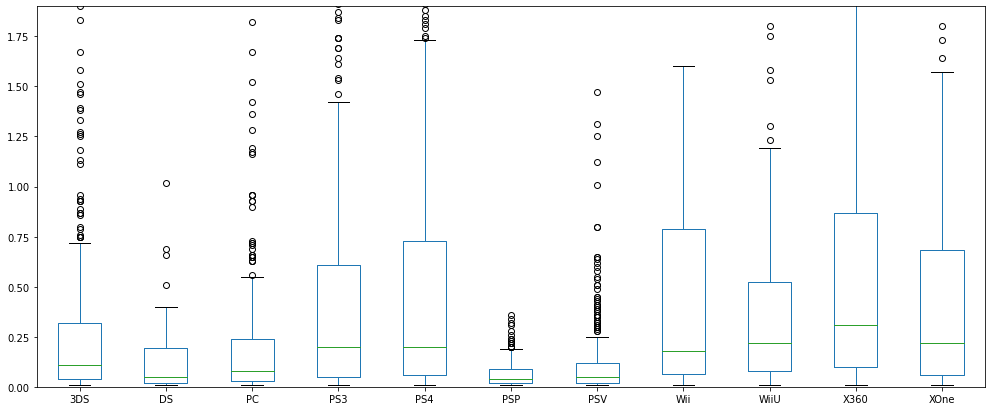

In [29]:
actual_data\
    .pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
    .plot(kind='box', ylim=(0,1.9), figsize=(17, 7))

Благодаря ящику с усами мы можем подвердить, что платформы PS4, XOne, 3DS являются потенциально прибыльными, так как у них похожая медиана. Мы можем увидеть, что у некоторых платформ много выбросов, например, у PSV, PC, 3DS, данные выбросы при первом взгляде без анализа могут запутать. Самые максимальные нормальные значения у таких платформ как X360, PS4 и XOne. 

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Соотнесем выводы с продажами игр на других платформах.

In [30]:
ps2 = df[df['platform']=='PS2']
ps2['user_score'].corr(ps2['total_sales'])

0.17378036664164548

Корреляция между оценками пользователей и продажами составляет всего 0.17, что говорит о том, что переменные практически не зависят друг от друга.

Text(0, 0.5, 'Суммарные продажи')

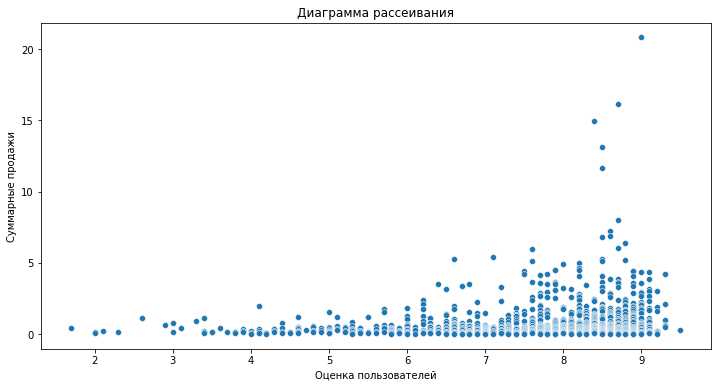

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps2)
plt.title("Диаграмма рассеивания")
plt.xlabel("Оценка пользователей")
plt.ylabel("Суммарные продажи")

В целом по диаграмме рассеивания можно сказать, что чем выше оценка пользователей, тем больше продажи, что звучит логично. Посмотрим на связь продаж и оценки критиков.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16565 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16565 non-null  object 
 1   platform         16565 non-null  object 
 2   year_of_release  16565 non-null  Int64  
 3   genre            16565 non-null  object 
 4   na_sales         16565 non-null  float64
 5   eu_sales         16565 non-null  float64
 6   jp_sales         16565 non-null  float64
 7   other_sales      16565 non-null  float64
 8   critic_score     8073 non-null   float64
 9   user_score       7538 non-null   float64
 10  rating           9866 non-null   object 
 11  total_sales      16565 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [33]:
ps2['critic_score'].corr(ps2['total_sales'])

0.3954055368563989

Text(0, 0.5, 'Суммарные продажи')

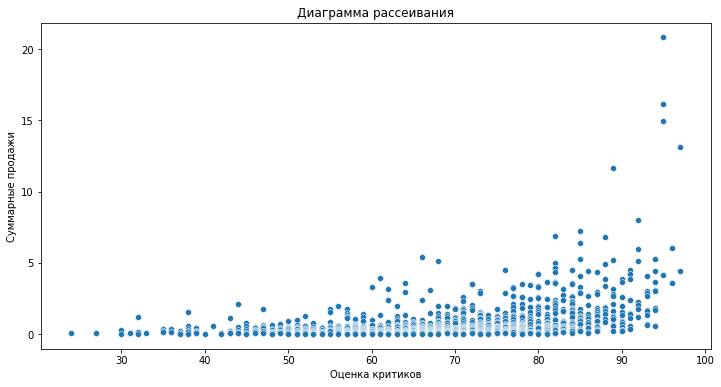

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps2)
plt.title("Диаграмма рассеивания")
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи")

По коэффициенту корреляции мы можем утверждать, что оценка критиков больше влияет на продажи, чем оценка пользователей. И также с увеличением оценки возрастают и продажи.
  
Возьмем еще три платформы и построим для них матрицы корреляций для сравнения с PS2.

In [35]:
xone = actual_data.query('platform == "XOne"')
pc = actual_data.query('platform == "PC"')
ps4 = actual_data.query('platform == "PS4"')

In [36]:
xone_cor = xone[['critic_score','user_score', 'total_sales']]
xone_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


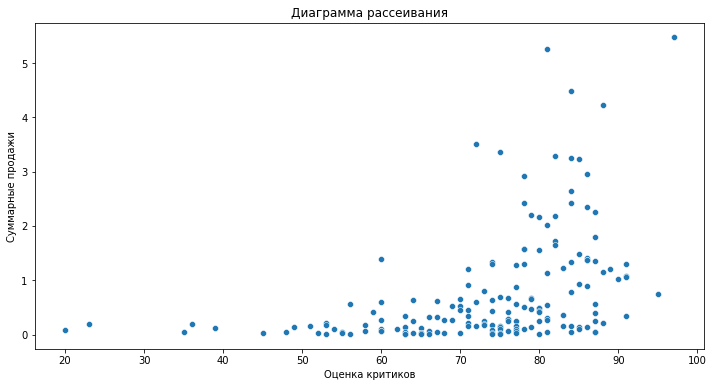

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone)
plt.title("Диаграмма рассеивания")
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи");

In [38]:
pc_cor = pc[['critic_score','user_score', 'total_sales']]
pc_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.431879,0.240570
user_score,0.431879,1.000000,-0.120339
total_sales,0.240570,-0.120339,1.000000


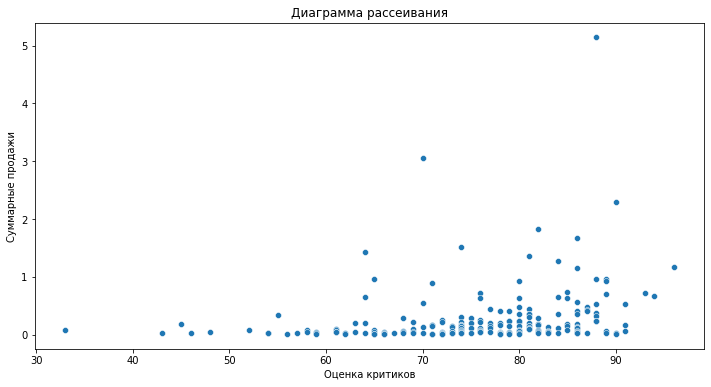

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=pc)
plt.title("Диаграмма рассеивания")
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи");

In [40]:
ps4_cor = ps4[['critic_score','user_score', 'total_sales']]
ps4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


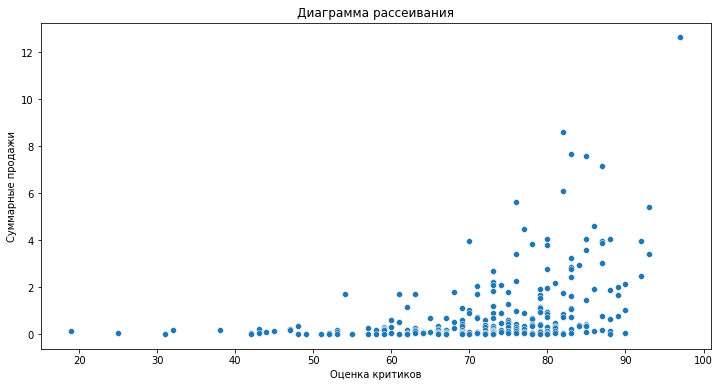

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.title("Диаграмма рассеивания")
plt.xlabel("Оценка критиков")
plt.ylabel("Суммарные продажи");

В целом можно сделать вывод о том, что на продажи в большей степени влияют оценки критиков.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [42]:
genre = df.pivot_table(
    index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre = genre.reset_index().rename_axis(None, axis=1)
genre

,genre,total_sales
0,Action,1735.63
1,Sports,1326.70
2,Shooter,1050.02
3,Role-Playing,931.77
4,Platform,825.55
5,Misc,794.41
6,Racing,725.82
7,Fighting,443.59
8,Simulation,388.46
9,Puzzle,240.54


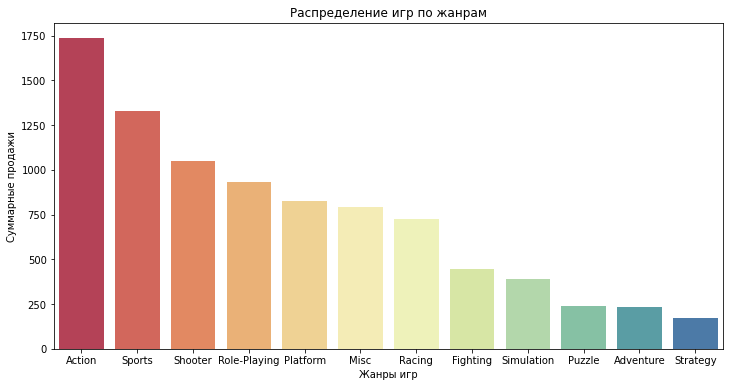

In [43]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам')
sns.barplot(data=genre, x='genre', y='total_sales', palette="Spectral")
plt.xlabel('Жанры игр')
plt.ylabel('Суммарные продажи');

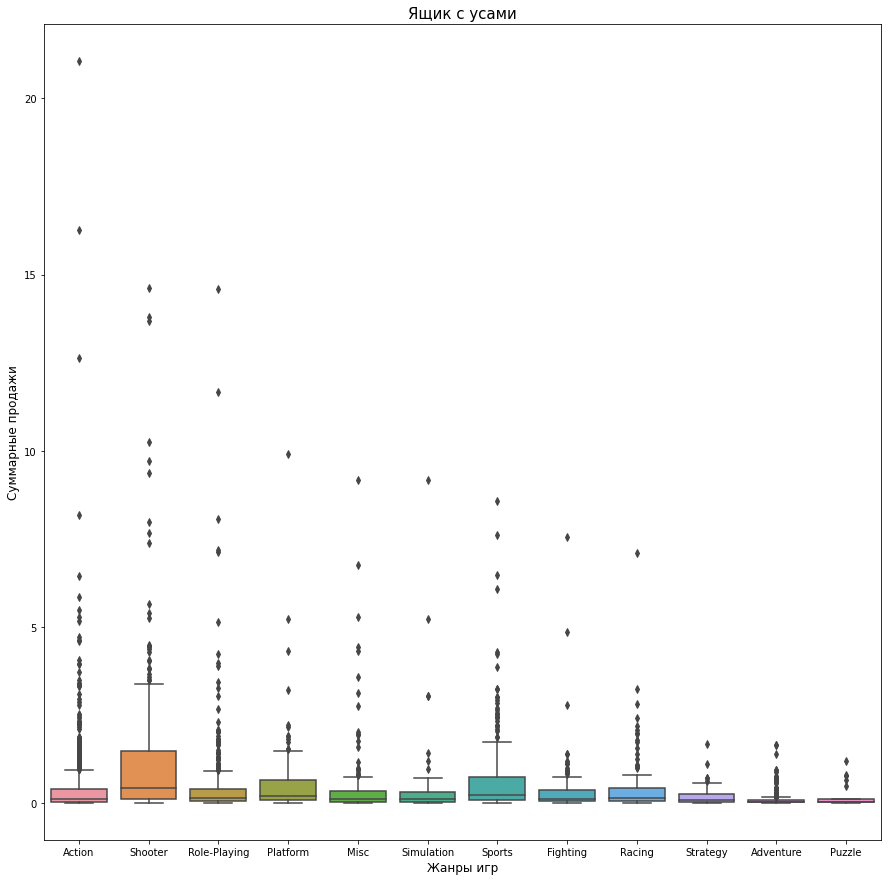

In [44]:
plt.figure(figsize=(15,15))
sns.boxplot(data=actual_data, x='genre', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Суммарные продажи', fontsize=12);

Посмотрев на ящик с усами, можно сказать, что самым популярным жанром являются шутеры и спортивные игры. Менее популярные - приключения и пазлы.

**Выводы:**
- Пик выпуска компьютерных игр пришёлся на 2008 год. С 2000 выпуск начал сильно расти, вероятно из-за распространения устройств, на которых люди могут играть в компьютерные игры. После 2008 года выпуск пошёл на убыль, скорее из-за появления мобильного гейминга. Данные до 1990 года не важны, так как игр созданных до этого крайне мало.

- Каждая платформа существует около 10 лет. Самыми продаваемыми платформами являются PlayStation (1, 2 и 3 версий), Xbox 360 и Nintendo DS и Wii.

- В итоге мы можем выделить общую тенденцию к снижению продаж среди всех платформ. Но при всём этом мы можем выделить потенциально прибыльные платформы и те, которые потенциально будут хуже продаваться. Потенциально прибыльные: PS4, XOne, 3DS. Потенциально будут продаваться хуже остальных: X360, Wii, PS3.

- На продажи в большей степени влияют оценки критиков.

- Лучшие продажи у игр в жанрах шутеры и спорт. На последнем месте - приключения и пазлы.

### Портрет пользователей разных регионов

#### Самые популярные платформы

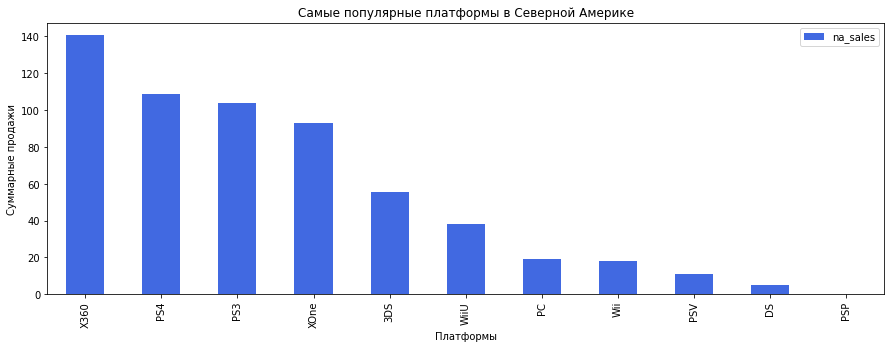

In [45]:
actual_data\
    .pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'na_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('royalblue'));
plt.title('Самые популярные платформы в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

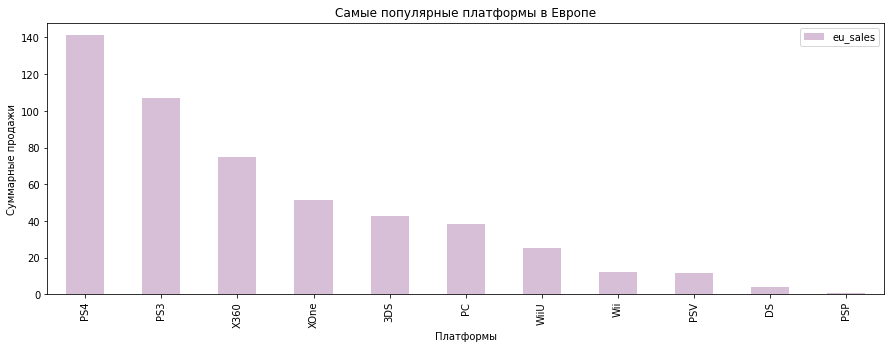

In [46]:
actual_data\
    .pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'eu_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('thistle'));
plt.title('Самые популярные платформы в Европе')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

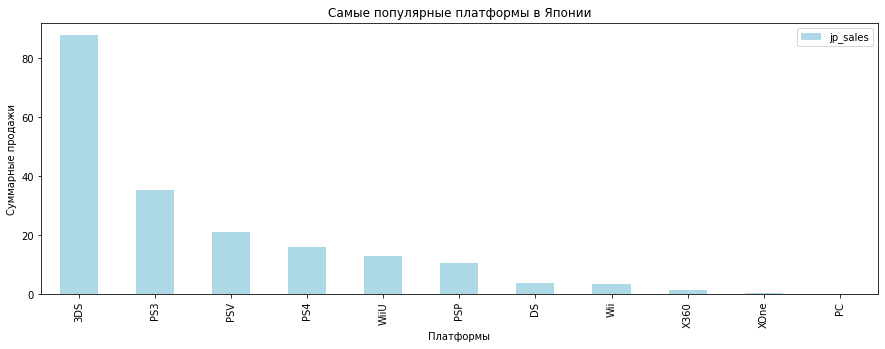

In [47]:
actual_data\
    .pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'jp_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('lightblue'));
plt.title('Самые популярные платформы в Японии')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи');

Самая популярная платформа в Северной Америке - X360, в Европе - PS3, в Японии - 3DC.

#### Самые популярные жанры

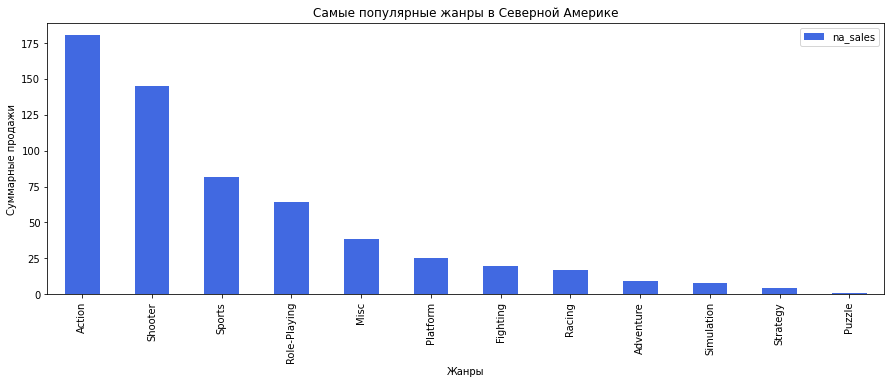

In [48]:
actual_data\
    .pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'na_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('royalblue'));
plt.title('Самые популярные жанры в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

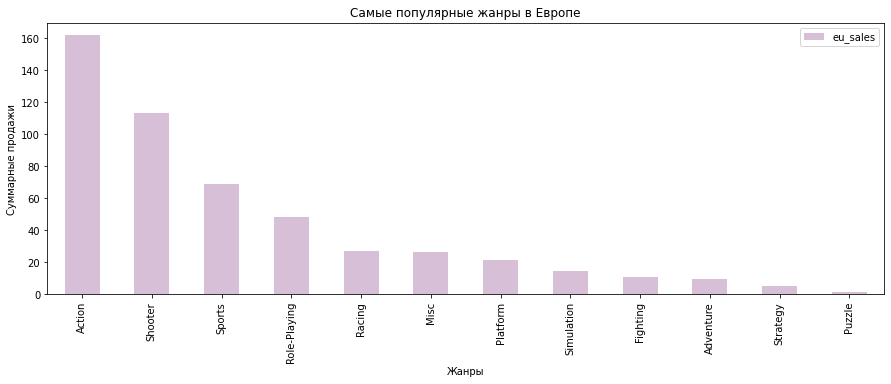

In [49]:
actual_data\
    .pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'eu_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('thistle'));
plt.title('Самые популярные жанры в Европе')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

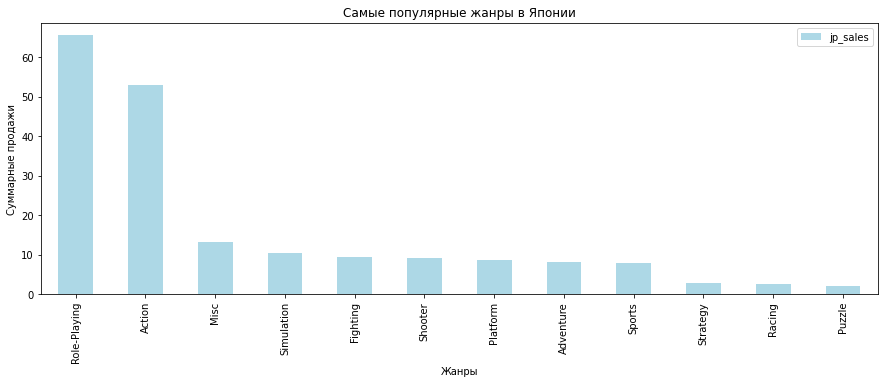

In [50]:
actual_data\
    .pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'jp_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('lightblue'));
plt.title('Самые популярные жанры в Японии')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи');

Самые популярные жанры в Северной Америке и в Европе совпадают - это экшн и шутеры. В Японии лидеры среди жанров - ролевые игры и экшн.

 #### Влияние рейтинга ESRB на продажи в отдельном регионе

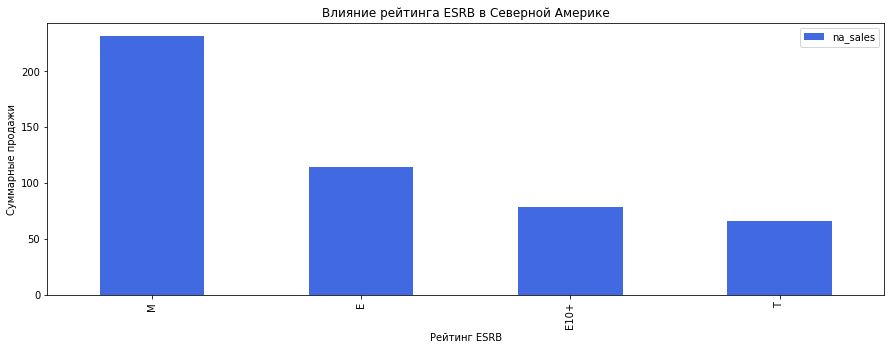

In [51]:
actual_data\
    .pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'na_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('royalblue'));
plt.title('Влияние рейтинга ESRB в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи');

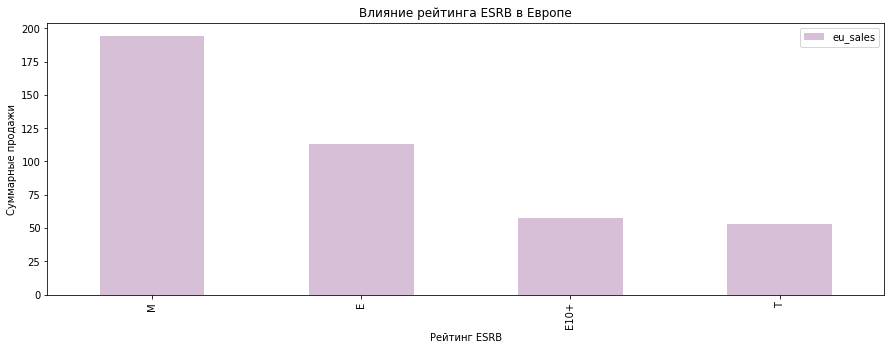

In [52]:
actual_data\
    .pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'eu_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('thistle'));
plt.title('Влияние рейтинга ESRB в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи');

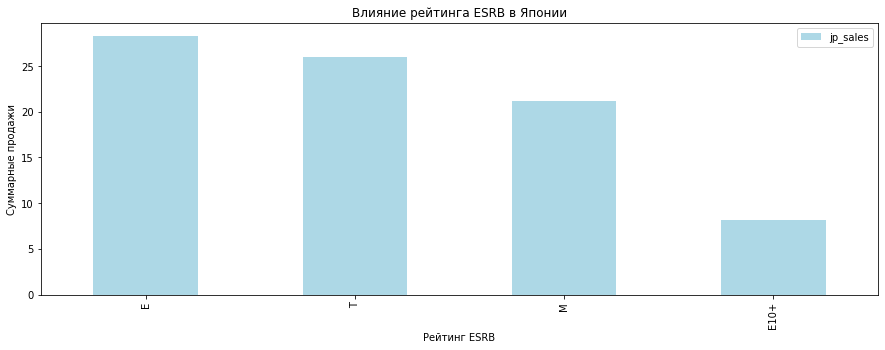

In [53]:
actual_data\
    .pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')\
    .sort_values(ascending=False, by = 'jp_sales')\
    .plot(kind = 'bar', figsize=(15,5), color=('lightblue'));
plt.title('Влияние рейтинга ESRB в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи');

Категории рейтинга (возраст, которому должен соответствовать пользователь):
- EC (раннее детство)
- E (каждый)
- Е10+ (каждому старше 10 лет)
- T (тинейджеры)
- M (старше 17)
- A (старше 18)
  
Рейтинг влияет на проаджи. Так самые большие продажи в Северной Америке и Европе игр с рейтингом М, а в Японии самые продаваемые игры категории Е.

### Проверка гипотез

**Гипотеза**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
  
**Нулевая гипотеза (Н0)**: Средние пользовательские рейтинги платформ Xbox One и PC равны. 
  
**Альтернативная гипотеза (Н1)**: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [54]:
xone = actual_data[(actual_data['platform'] == 'XOne') &  (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', xone.mean())
print('Средний пользовательский рейтинг платформы PC:', pc.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.4454976303317535


In [55]:
alpha = .01

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


Первоначально для проверки была гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В этом случае нам не так важно, в ином случае какой показатель больше или меньше, поэтому выбираем двустороннюю гипотезу. В итоге мы не можем отвергнуть нулевую гипотезу.

**Гипотеза**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
  
**Нулевая гипотеза (Н0)**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. 
  
**Альтернативная гипотеза (Н1)**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.

In [56]:
action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг жанра action:', action.mean())
print('Средний пользовательский рейтинг жанра sports', sports.mean())

Средний пользовательский рейтинг жанра action: 6.834274952919021
Средний пользовательский рейтинг жанра sports 5.455670103092784


In [57]:
alpha = .01

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.3183730691020093e-20
Отвергаем нулевую гипотезу


В результате проверки мы отвергаем нулевую гипотезу. 

### Общие выводы

В рамках всей работы мы прошли шесть пунктов:
- **Загрузка данных**.
- **Подготовка данных**. В итоге предобработки мы привели названия столбцов к нижнему регистру, поменяли тип данных в трёх переменных, избавились от некоторых пропусков и дубликатов. Создали столбцец с суммарными продажами, который понадобится нам в анализе.
- **Исследовательский анализ данных**. Мы пришли к следующим выводам:
  - Пик выпуска компьютерных игр пришёлся на 2008 год. С 2000 выпуск начал сильно расти, вероятно из-за распространения устройств, на которых люди могут играть в компьютерные игры. После 2008 года выпуск пошёл на убыль, скорее из-за появления мобильного гейминга. Данные до 1990 года не важны, так как игр созданных до этого крайне мало.   - Каждая платформа существует около 10 лет. Самыми продаваемыми платформами являются PlayStation (1, 2 и 3 версий), Xbox 360 и Nintendo DS и Wii.
  - В итоге мы можем выделить общую тенденцию к снижению продаж среди всех платформ. Но при всём этом мы можем выделить потенциально прибыльные платформы и те, которые потенциально будут хуже продаваться. Потенциально прибыльные: PS4, XOne, 3DS. Потенциально будут продаваться хуже остальных: X360, Wii, PS3.
  - На продажи в большей степени влияют оценки критиков.
  - Лучшие продажи у игр в жанрах экшн и спорт. На последнем месте - приключения и стратегии.
- **Портрет пользователей разных регионов**. Вот как можно описать пользователей:
  - **Северная Америка**. Самые популярные платформы - X360, PS3 и PS4. Самые популярные жанры - экшн и шутеры, меньше всего в данном регионе играют в стратегии и пазлы. Игры категории М и Е популярнее всего.
  - **Европа**. Больше всего в Европе играют на PS3, PS4 и X360. Популярные жанры - экшн и шутеры, меньше всего играют в стратегии и пазлы. Игры категории М и Е популярнее всего.
  - **Япония**. Самые популярные платформы - 3DS, PS3, PSP. Жанры - ролевые игры и экшн, менее популярные - также стратегии и пазлы. Популярнее всего игры категорий Е и Т.
- **Проверка гипотез**.
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Не получилось отвергнуть нулевую гипотезу.
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Отвергаем нулевую гипотезу.